Here we are going to build sentiment analysis model

**Importing libraries**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataset

In [45]:
df=pd.read_csv('/content/a1_RestaurantReviews_HistoricDump.tsv',delimiter='\t')

In [46]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [47]:
df.shape

(900, 2)

In [48]:
df['Liked'].value_counts()

,count
Liked,
1,496
0,404


In [49]:
y=df['Liked']

**Data Preprocessing**

In [50]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [51]:
nltk.download('stopwords')
ps=PorterStemmer()
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
stop_words.remove('not')

**Data Cleaning**

In [85]:
def datacleaning(review):
    review=re.sub('[^a-zA-Z0-9]',' ',review)
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stop_words]
    review=' '.join(review)
    return review

In [55]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding,InputLayer,LSTM,Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [56]:
def onehot(corpus):
  voc_words=3000
  onehot_words=[one_hot(word,voc_words) for word in corpus]
  return onehot_words

Now as it is diff in size we use padding using encoding

In [57]:
def pad(onehot_words):
  step_words=20
  padding_words=pad_sequences(onehot_words,maxlen=step_words,padding='pre')
  return padding_words

In [70]:
padding_words[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 1543,  180,  511], dtype=int32)

**Creating model with Embedding and LSTM**

In [59]:
## output of padding is given into model as input here it is in 20 vectors
vector_features=40 ##features representation dimensions like google 300 dimension
step_words=20
voc_words=3000
model=Sequential()
model.add(InputLayer(input_shape=(step_words,)))
model.add(Embedding(input_dim=voc_words,output_dim=vector_features))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 20, 40)              │         120,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          56,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,501 (689.46 KB)

 Trainable params: 176,501 (689.46 KB)

 Non-trainable params: 0 (0.00 B)

None


**Calling all the functions created**

In [87]:
df['clean_data']=df['Review'].apply(datacleaning)
corpus_data=df['clean_data'].tolist()
onehotdata=onehot(corpus_data)
df.drop('clean_data',axis=1)
pad_data=pad(onehotdata)

In [90]:
X=np.array(pad_data)
Y=np.array(y)

In [91]:
Y.shape

(900,)

In [92]:
X.shape,Y.shape

((900, 20), (900,))

**Train Test Split**

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [94]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9907 - loss: 0.0300 - val_accuracy: 0.7556 - val_loss: 0.7761
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.9914 - loss: 0.0338 - val_accuracy: 0.7370 - val_loss: 0.8407
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9942 - loss: 0.0290 - val_accuracy: 0.7407 - val_loss: 0.9412
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9977 - loss: 0.0178 - val_accuracy: 0.7593 - val_loss: 1.0565
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9981 - loss: 0.0152 - val_accuracy: 0.7593 - val_loss: 1.1348
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9962 - loss: 0.0129 - val_accuracy: 0.7519 - val_loss: 1.0949
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9994 - loss: 0.0144 - val_accuracy: 0.7556 - val_loss: 1.0405
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9957 - loss: 0.0141 - val_accuracy: 0.7370 - v

**Saving the model for later use**

In [95]:
model.save('sentiment_model.h5')

In [96]:
y_pred=model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [97]:
y_pred=np.where(y_pred >0.5,1,0)

**Model accuracy**

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7481481481481481

**Model Evaluation**

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.59      0.68       124
           1       0.72      0.88      0.79       146

    accuracy                           0.75       270
   macro avg       0.76      0.74      0.74       270
weighted avg       0.76      0.75      0.74       270



**Testing new data for our model**

In [102]:
df_newdata=pd.read_csv('/content/a2_RestaurantReviews_FreshDump.tsv',delimiter='\t')

In [103]:
df_newdata.head()

,Review
0,Spend your money elsewhere.
1,Their regular toasted bread was equally satisf...
2,The Buffet at Bellagio was far from what I ant...
3,"And the drinks are WEAK, people!"
4,-My order was not correct.


**Cleaning testing data**

In [123]:

df_newdata['clean_data']=df_newdata['Review'].apply(datacleaning)
corpus_data1=df_newdata['clean_data'].tolist()
onehotdata1=onehot(corpus_data)
df_newdata=df_newdata.drop(columns='clean_data',axis=1)
pad_data1=pad(onehotdata)


In [124]:
X_freshdata=np.array(pad_data1)

**importing the model**

In [125]:
from tensorflow.keras.models import load_model

In [126]:
model_load = load_model('/content/sentiment_model.h5')

In [131]:
y_pred1=model_load.predict(X_freshdata)
y_pred1=np.where(y_pred1 >0.8,1,0)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [132]:
df_newdata['predicted_label']=y_pred1
df_newdata.head()

,Review,predicted_label
0,Spend your money elsewhere.,0
1,Their regular toasted bread was equally satisf...,1
2,The Buffet at Bellagio was far from what I ant...,1
3,"And the drinks are WEAK, people!",1
4,-My order was not correct.,0


In [133]:
df_newdata.to_csv("Outputdata.csv",encoding='UTF-8',index=False)

**Visualizing the predicted output**

In [134]:
import matplotlib.pyplot
%matplotlib inline

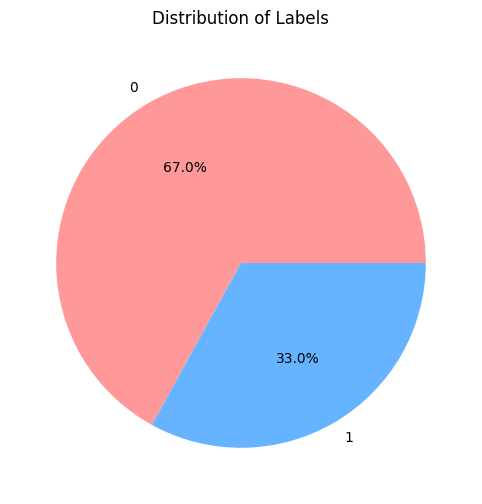

In [137]:
label_counts=df_newdata['predicted_label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Labels')
plt.show()